# Task 4: Learning NumPy and Pandas using Jupyter Notebooks

Dataset used: Global AI Job Market & Salary Trends 2025(https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Plot style
sns.set(style="whitegrid")

In [3]:
# Loading dataset
df = pd.read_csv("ai_job_dataset.csv", parse_dates=["posting_date", "application_deadline"])
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## NumPy

In [4]:
# Convert to NumPy arrays
salary_array = df["salary_usd"].to_numpy()
remote_ratio_array = df["remote_ratio"].to_numpy()
years_exp_array = df["years_experience"].to_numpy()
benefits_score_array = df["benefits_score"].to_numpy()

# Basic calculations
print(f"Mean Salary: {np.mean(salary_array):.2f}")
print(f"Median Salary: {np.median(salary_array):.2f}")
print(f"Salary Std Dev: {np.std(salary_array):.2f}")

# Percentiles
percentiles = np.percentile(salary_array, [25, 50, 75])
print("Salary Percentiles:", percentiles)

# Normalization
salary_norm = (salary_array - np.min(salary_array)) / (np.max(salary_array) - np.min(salary_array))
print("First 5 normalized salaries:", salary_norm[:5])

# Correlation (Salary vs Benefits Score)
corr_matrix = np.corrcoef(salary_array, benefits_score_array)
print("Correlation matrix (Salary vs Benefits Score):\n", corr_matrix)

# Boolean Masking
high_salary_mask = salary_array > np.percentile(salary_array, 90)
high_salary_jobs = df[high_salary_mask]
print(f"High Salary Jobs (Top 10%): {high_salary_jobs.shape[0]}")

# Aggregation by Experience Level
experience_levels = df["experience_level"].unique()

for level in experience_levels:
    mask = df["experience_level"] == level
    mean_salary = np.mean(salary_array[mask])
    print(f"Mean salary for {level}: {mean_salary:.2f}")

Mean Salary: 115348.97
Median Salary: 99705.00
Salary Std Dev: 60258.93
Salary Percentiles: [ 70179.75  99705.   146408.5 ]
First 5 normalized salaries: [0.15783085 0.08013618 0.32764556 0.13011217 0.06030127]
Correlation matrix (Salary vs Benefits Score):
 [[1.00000000e+00 9.85230548e-04]
 [9.85230548e-04 1.00000000e+00]]
High Salary Jobs (Top 10%): 1500
Mean salary for SE: 122187.66
Mean salary for EN: 63133.38
Mean salary for MI: 87955.47
Mean salary for EX: 187723.65


## Pandas

In [5]:
# Basic Info
df.info()

# Describe All Columns
df.describe(include="all")

# Missing Values
df.isnull().sum()

# Remove Duplicates
df = df.drop_duplicates()

# Feature Engineering
df["salary_inr"] = df["salary_usd"] * 83
df["primary_skill"] = df["required_skills"].str.split(",").str[0]

# Aggregation - Salary by Company Size
salary_by_company_size = df.groupby("company_size")["salary_usd"].mean()
print("Average Salary by Company Size:\n", salary_by_company_size)

# Pivot Table
pivot_table = df.pivot_table(
    values="salary_usd",
    index="experience_level",
    columns="remote_ratio",
    aggfunc="mean"
)
print("Pivot Table:\n", pivot_table)

# Top 10 Companies by Benefits Score
top_companies = df.sort_values(by="benefits_score", ascending=False).head(10)
top_companies[["company_name", "benefits_score"]]

# Posting Deadlines
df["days_to_deadline"] = (df["application_deadline"] - df["posting_date"]).dt.days
urgent_jobs = df[df["days_to_deadline"] <= 30]
print(f"Urgent Jobs (closing within 30 days): {urgent_jobs.shape[0]}")

# Save processed dataframe
df.to_csv("ai_job_dataset_processed.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

## Visualisation

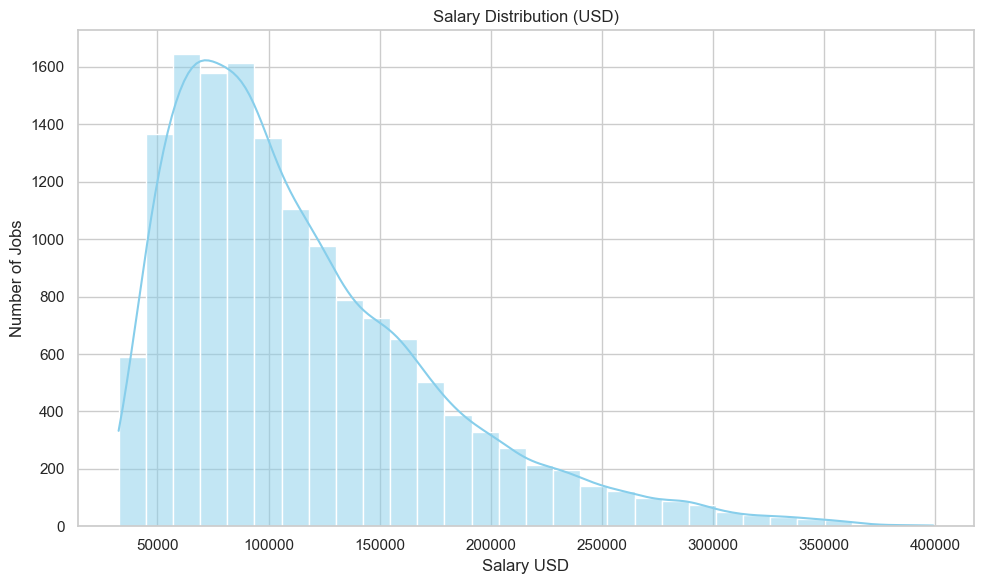

C:\Users\tanrc\AppData\Local\Temp\ipykernel_4948\3935669153.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="years_experience", y="salary_usd", hue="experience_level", data=df, estimator='mean', ci=None)


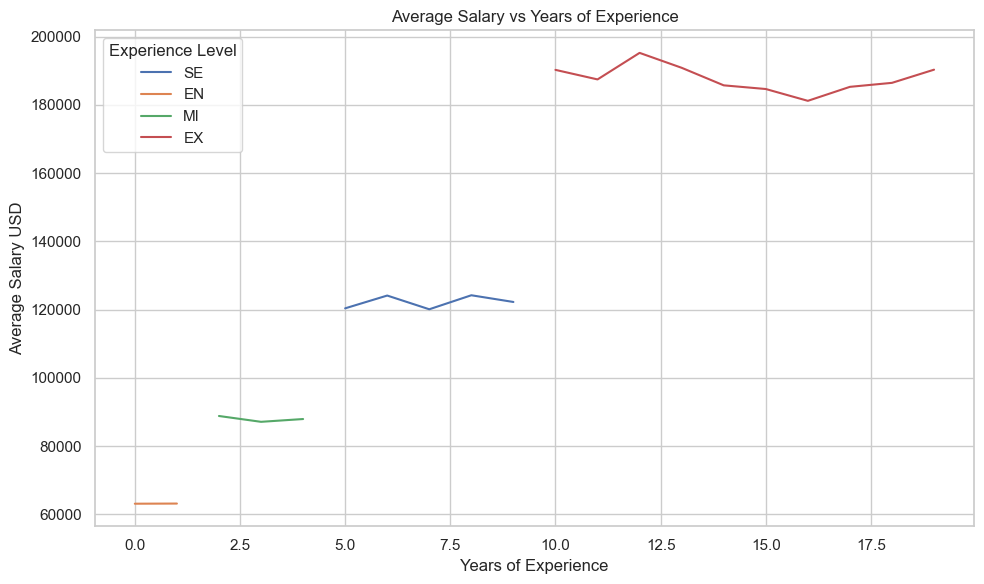

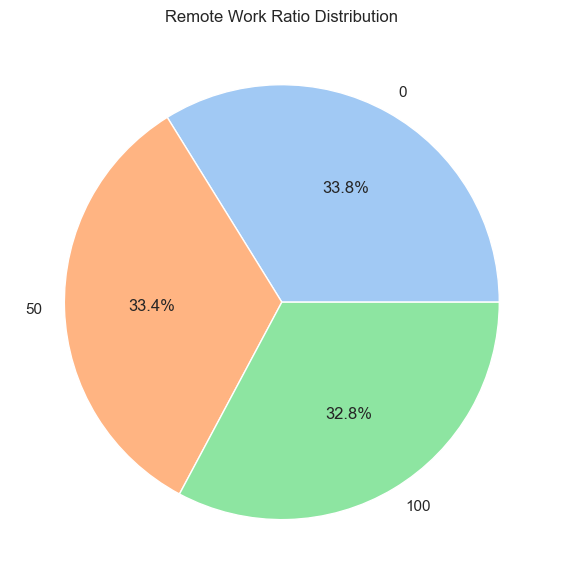

C:\Users\tanrc\AppData\Local\Temp\ipykernel_4948\3935669153.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="company_size", y="salary_usd", data=df, estimator=np.mean, ci="sd", palette="Set2")
C:\Users\tanrc\AppData\Local\Temp\ipykernel_4948\3935669153.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="company_size", y="salary_usd", data=df, estimator=np.mean, ci="sd", palette="Set2")


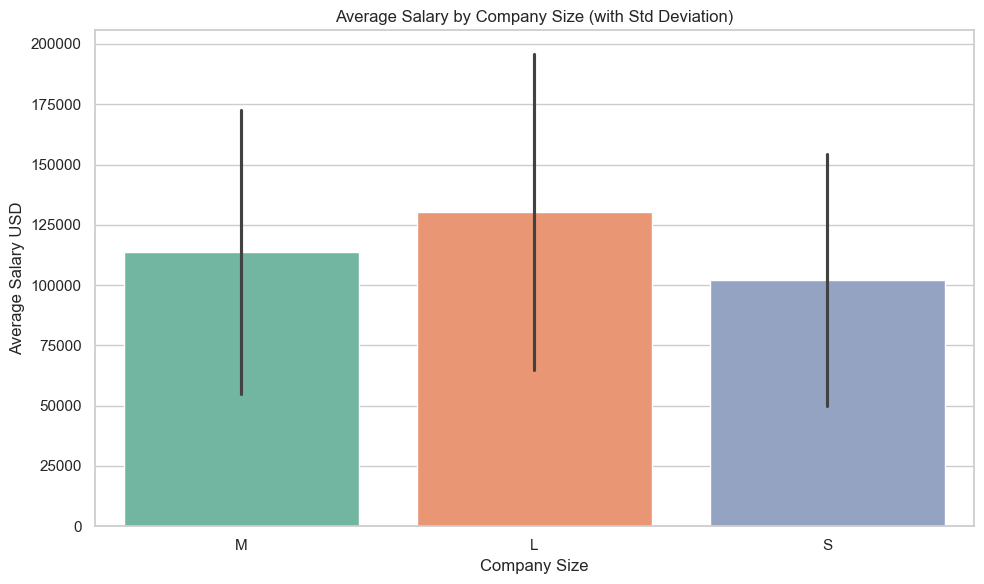

C:\Users\tanrc\AppData\Local\Temp\ipykernel_4948\3935669153.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="company_size", y="salary_usd", data=df, inner="quart", palette="Set2")


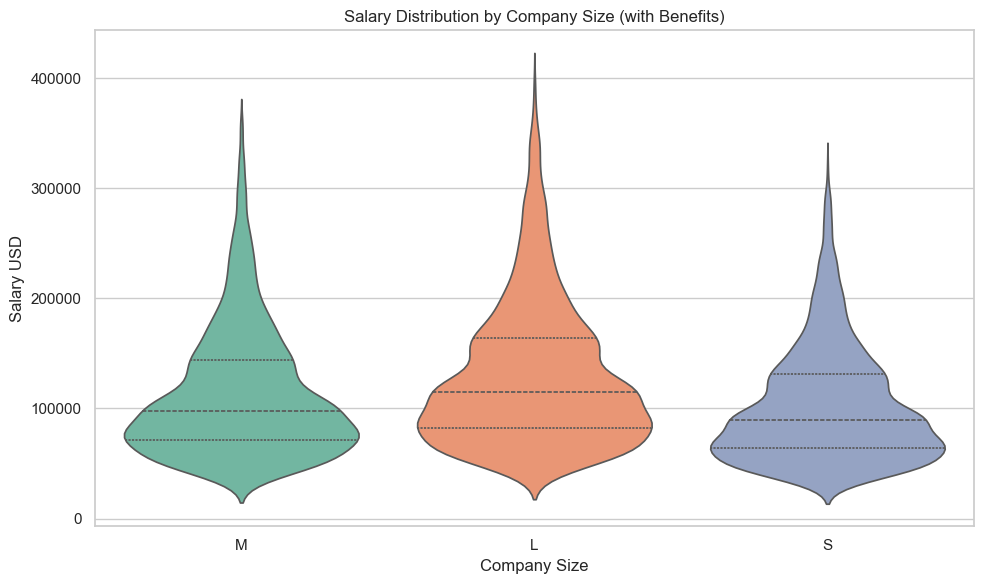

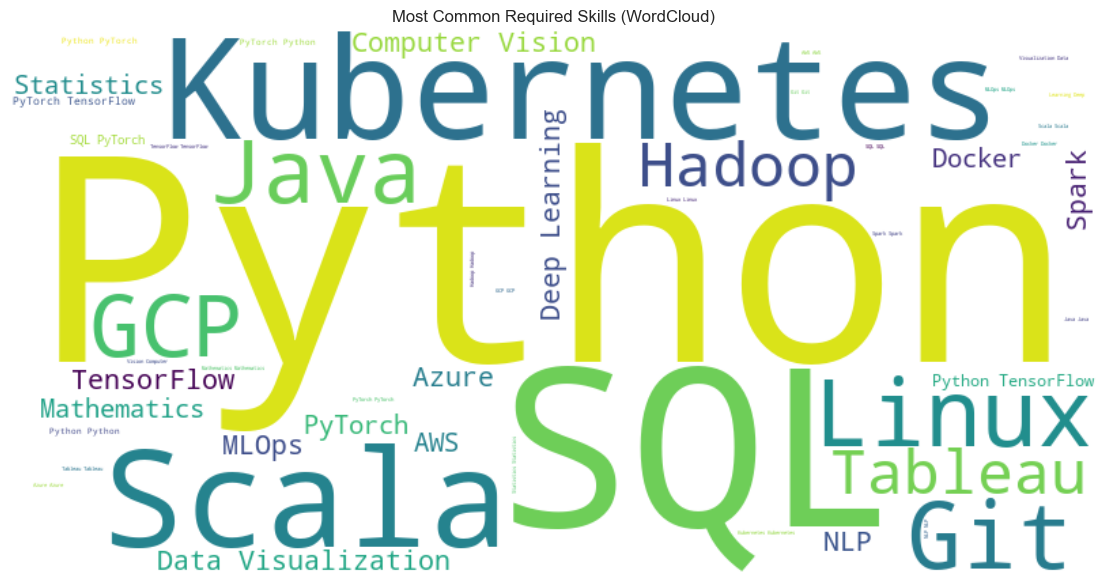

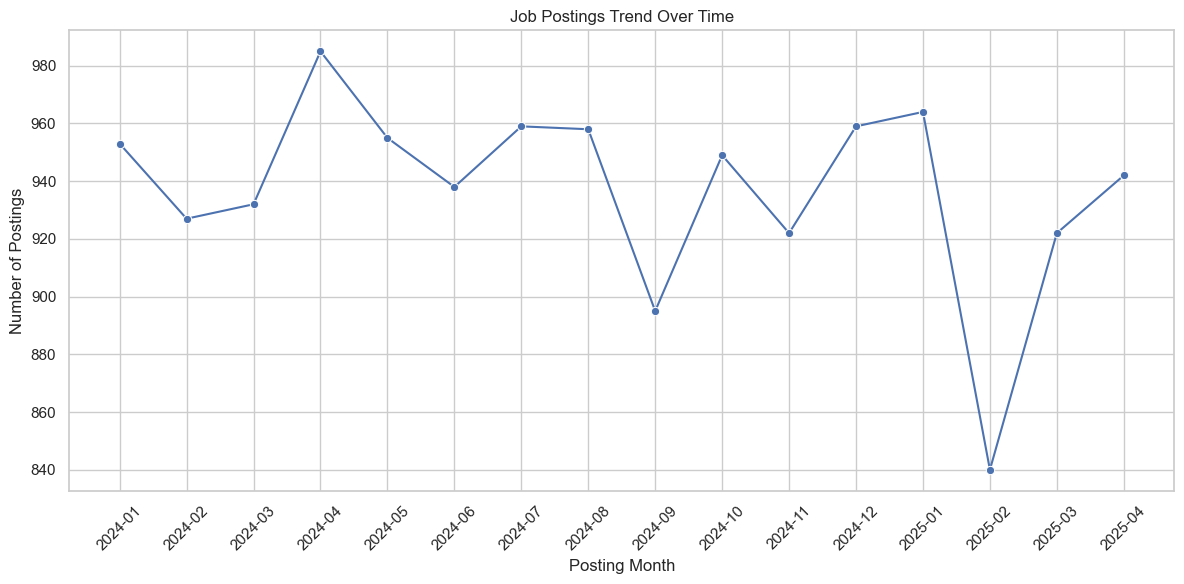

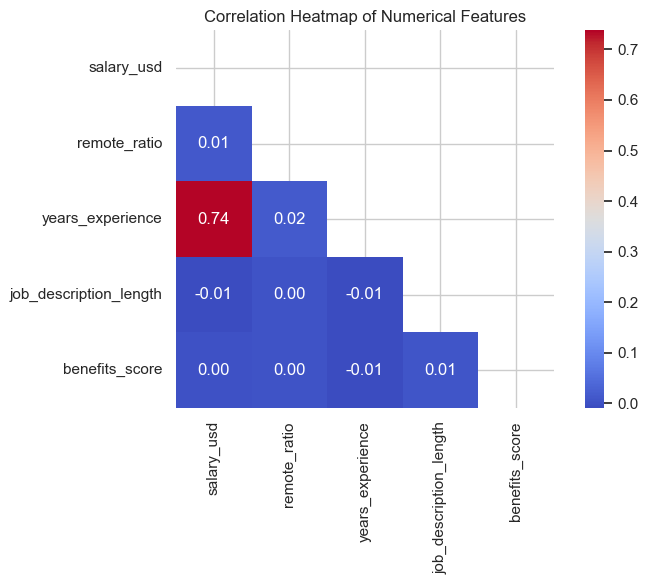

In [8]:
# ----- Salary Distribution -----
plt.figure(figsize=(10,6))
sns.histplot(df["salary_usd"], kde=True, bins=30, color='skyblue')
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary USD")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()

# ----- Salary vs Years of Experience (Enhanced) -----
plt.figure(figsize=(10,6))
sns.lineplot(x="years_experience", y="salary_usd", hue="experience_level", data=df, estimator='mean', ci=None)
plt.title("Average Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary USD")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

# ----- Remote Ratio Distribution (Enhanced as Pie Chart) -----
remote_counts = df["remote_ratio"].value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(remote_counts, labels=remote_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Remote Work Ratio Distribution")
plt.tight_layout()
plt.show()

# ----- Average Salary by Company Size -----
plt.figure(figsize=(10,6))
sns.barplot(x="company_size", y="salary_usd", data=df, estimator=np.mean, ci="sd", palette="Set2")
plt.title("Average Salary by Company Size (with Std Deviation)")
plt.xlabel("Company Size")
plt.ylabel("Average Salary USD")
plt.tight_layout()
plt.show()


# ----- Salary vs Benefits Score (Enhanced as Violin Plot) -----
plt.figure(figsize=(10,6))
sns.violinplot(x="company_size", y="salary_usd", data=df, inner="quart", palette="Set2")
plt.title("Salary Distribution by Company Size (with Benefits)")
plt.xlabel("Company Size")
plt.ylabel("Salary USD")
plt.tight_layout()
plt.show()

# ----- Top Required Skills (WordCloud) -----
skills_text = " ".join(df["required_skills"].dropna().str.replace(",", " ").tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Required Skills (WordCloud)")
plt.tight_layout()
plt.show()

# ----- Posting Date Trends (Enhanced as Line Chart) -----
df["posting_month"] = df["posting_date"].dt.to_period("M").astype(str)
monthly_postings = df["posting_month"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_postings.index, y=monthly_postings.values, marker='o')
plt.title("Job Postings Trend Over Time")
plt.xlabel("Posting Month")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----- Correlation Heatmap -----
num_cols = ["salary_usd", "remote_ratio", "years_experience", "job_description_length", "benefits_score"]
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()